In [ ]:
# Plot 100 for acf and pacf to see if there is seasonality involved
# Do timeseries decomposition and find strength of seasonality and strength of trend
# GPAC to see if there is a pattern 
# If you have seasonality then you do seansoanl differencing then do acf and pacf then feed that into the gpac. 
#then you will find order of NA and Np of SARIMA Model

#Recommendation:
    #do timeseries decomposition 
    # find trend seasonality 
    #then do autucorrelation for longer 100 then if you spot seasnoalit you do seasonal differencing then u put 
    #in the d parameter

    # before feeding to gpac you have to make data sattionary and plot rolling mean and rolling variance make sure its 
    #stationary then estimate the autocorrelation then feed autucorrelation into gpac and see if u can see a pattern

    #check lab 6, 7, 8, 9, 10
    
#plot rolling mean and variance of stationarity dataset   
#Plot ACF and pacf of stationart data set
# calculate autucorrolation of stationary data set
#feed it to the GPAC, read the pattern, estimate the coeffecient, develop forecast function then do prediction

In [1]:
import pandas_datareader as web

In [2]:
!pip install pandas_datareader

In [2]:
arima = web.DataReader('MRIN', data_source='yahoo', start='2002-01-01', end ='2021-09-29')
arima

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-03-22,139.649994,113.820000,133.000000,113.820000,1570286.0,113.820000
2013-03-25,116.550003,106.050003,116.550003,111.089996,177743.0,111.089996
2013-03-26,121.660004,112.070000,113.050003,119.279999,49871.0,119.279999
2013-03-27,119.000000,115.430000,119.000000,115.849998,28986.0,115.849998
2013-03-28,116.970001,113.050003,115.919998,115.010002,15871.0,115.010002
...,...,...,...,...,...,...
2021-09-23,8.680000,7.540000,8.050000,8.540000,19136300.0,8.540000
2021-09-24,11.420000,8.220000,8.380000,10.210000,77131700.0,10.210000
2021-09-27,11.150000,9.520000,10.020000,10.500000,21574700.0,10.500000


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import datetime as dt

In [4]:
arima = arima[["Close"]].copy()
arima

,Close
Date,
2013-03-22,113.820000
2013-03-25,111.089996
2013-03-26,119.279999
2013-03-27,115.849998
2013-03-28,115.010002
...,...
2021-09-23,8.540000
2021-09-24,10.210000
2021-09-27,10.500000


# Stock Price Visualization:

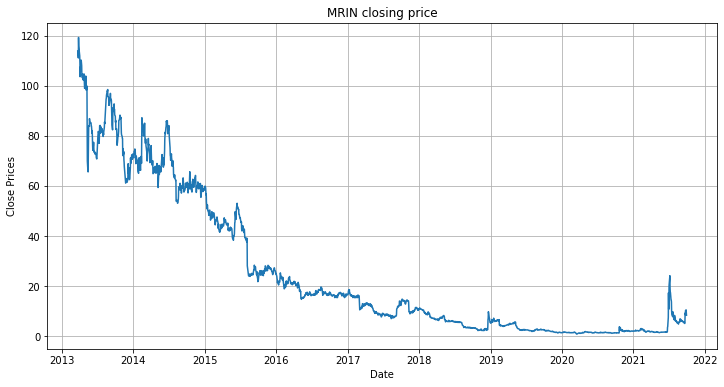

In [5]:
#plot close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(arima)
plt.title('MRIN closing price')
plt.show()

# Dataset Probability Distribution:

<AxesSubplot:ylabel='Density'>

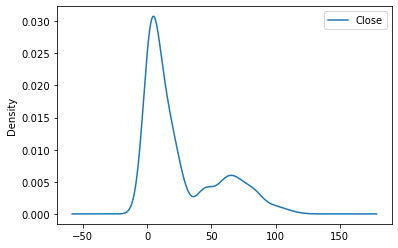

In [7]:
#Distribution of the dataset
MRIN = arima
MRIN.plot(kind='kde')

In [ ]:
# A time series is also regarded to include three systematic components: 
#level, trend, and seasonality, as well as one non-systematic component termed noise.

#1) The average value in the series is called the level.
#2)The increasing or falling value in the series is referred to as the trend.
#3)Seasonality is the series’ recurring short-term cycle.
#4)The random variance in the series is referred to as noise.

# Autocorrelation & Partial Autocorrelation

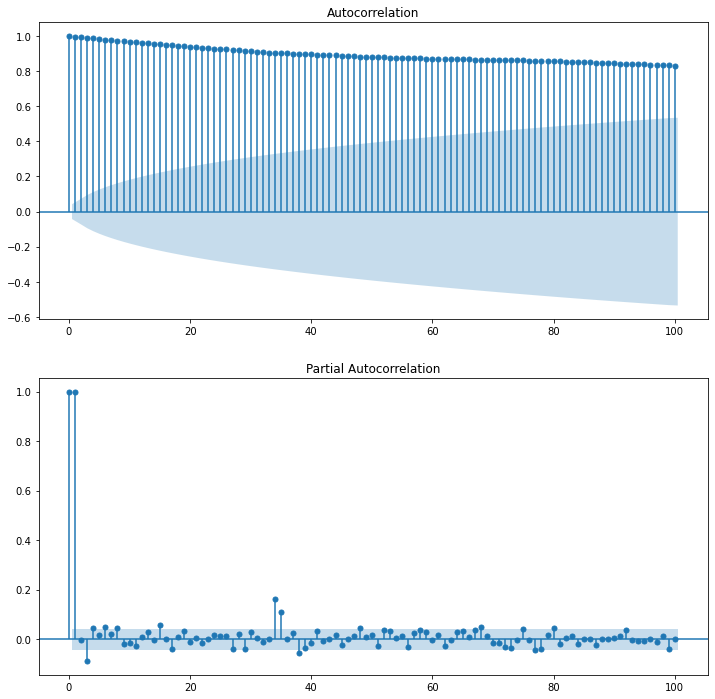

In [6]:
lags = 100

plt.figure(figsize=(12,12))
plt.subplot(211)
plot_acf(arima, ax=plt.gca(), lags = lags)

plt.subplot(212)
plot_pacf(arima, ax=plt.gca(), lags = lags)
plt.show()


# Rolling Statistics Test for staionarity:

In [8]:
Rolling = arima.reset_index()
for i in range(0, arima.shape[0]):
    n = i+1
    mean = sum(arima.head(n)['Close']/n)
    num = (arima['Close'][i] - mean)**2
    arima.loc[arima.index[i], 'Rolling Mean'] = mean
    arima.loc[arima.index[i], 'Rolling Variance'] = num/(n-1)

In [9]:
Rolling

,Date,Close,Rolling Mean,Rolling Variance
0,2013-03-22,113.820000,113.820000,NaN
1,2013-03-25,111.089996,112.454998,1.863230e+00
2,2013-03-26,119.279999,114.729998,1.035125e+01
3,2013-03-27,115.849998,115.009998,2.352001e-01
4,2013-03-28,115.010002,115.009999,2.328306e-12
...,...,...,...,...
2142,2021-09-23,8.540000,25.120131,1.283383e-01
2143,2021-09-24,10.210000,25.113176,1.036419e-01
2144,2021-09-27,10.500000,25.106364,9.950833e-02
2145,2021-09-28,9.360000,25.099026,1.154858e-01


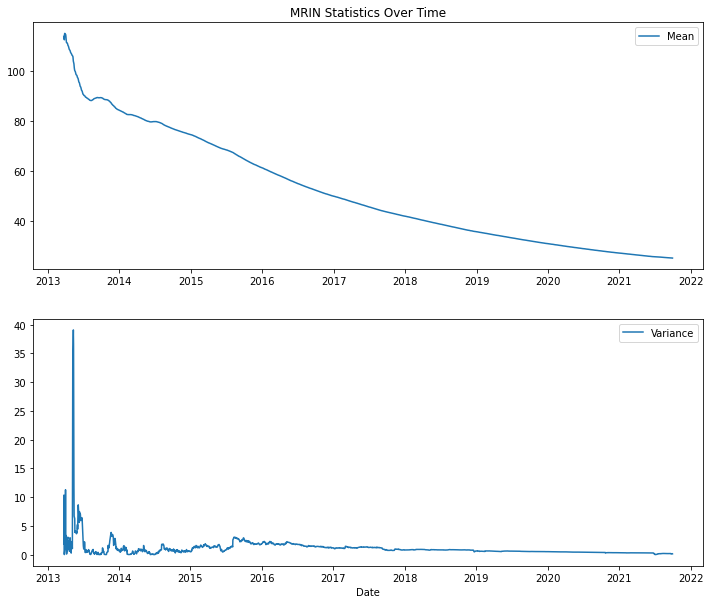

In [10]:
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.title('MRIN Statistics Over Time')
plt.plot(Rolling.Date, Rolling['Rolling Mean'], label='Mean')
plt.legend()
plt.subplot(212)
plt.plot(Rolling.Date, Rolling['Rolling Variance'], label='Variance')
plt.legend()
plt.xlabel('Date')
plt.show()

In [13]:
arima

,Close,Rolling Mean,Rolling Variance
Date,,,
2013-03-22,113.820000,113.820000,NaN
2013-03-25,111.089996,112.454998,1.863230e+00
2013-03-26,119.279999,114.729998,1.035125e+01
2013-03-27,115.849998,115.009998,2.352001e-01
2013-03-28,115.010002,115.009999,2.328306e-12
...,...,...,...
2021-09-23,8.540000,25.120131,1.283383e-01
2021-09-24,10.210000,25.113176,1.036419e-01
2021-09-27,10.500000,25.106364,9.950833e-02


In [14]:
arima = arima[['Close']].copy()
arima

,Close
Date,
2013-03-22,113.820000
2013-03-25,111.089996
2013-03-26,119.279999
2013-03-27,115.849998
2013-03-28,115.010002
...,...
2021-09-23,8.540000
2021-09-24,10.210000
2021-09-27,10.500000


# ADF (Augmented Dickey-Fuller) Test for staionarity:

1) ADF test


In [16]:
# ADF test on MRIN

result = adfuller(arima['Close'])
print('MRIN')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MRIN
ADF Statistic: -3.062335
p-value: 0.029469
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:

# Since the p-value is bigger than 0.05, the series non-stationary.
# the test statistics exceed the critical values. As a result, the data is nonlinear.

# Seasonality & Trend Strength:

In [17]:
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
data = arima['Close']
data = data.resample('M').mean().ffill()
data

Date
2013-03-31    115.009999
2013-04-30    105.089091
2013-05-31     85.660909
2013-06-30     74.459000
2013-07-31     81.190455
                 ...    
2021-05-31      1.536500
2021-06-30      3.201364
2021-07-31     12.039524
2021-08-31      5.856364
2021-09-30      6.868500
Freq: M, Name: Close, Length: 103, dtype: float64

In [19]:
stl = STL(data)
res = stl.fit()

t = res.trend
s = res.seasonal
r = res.resid

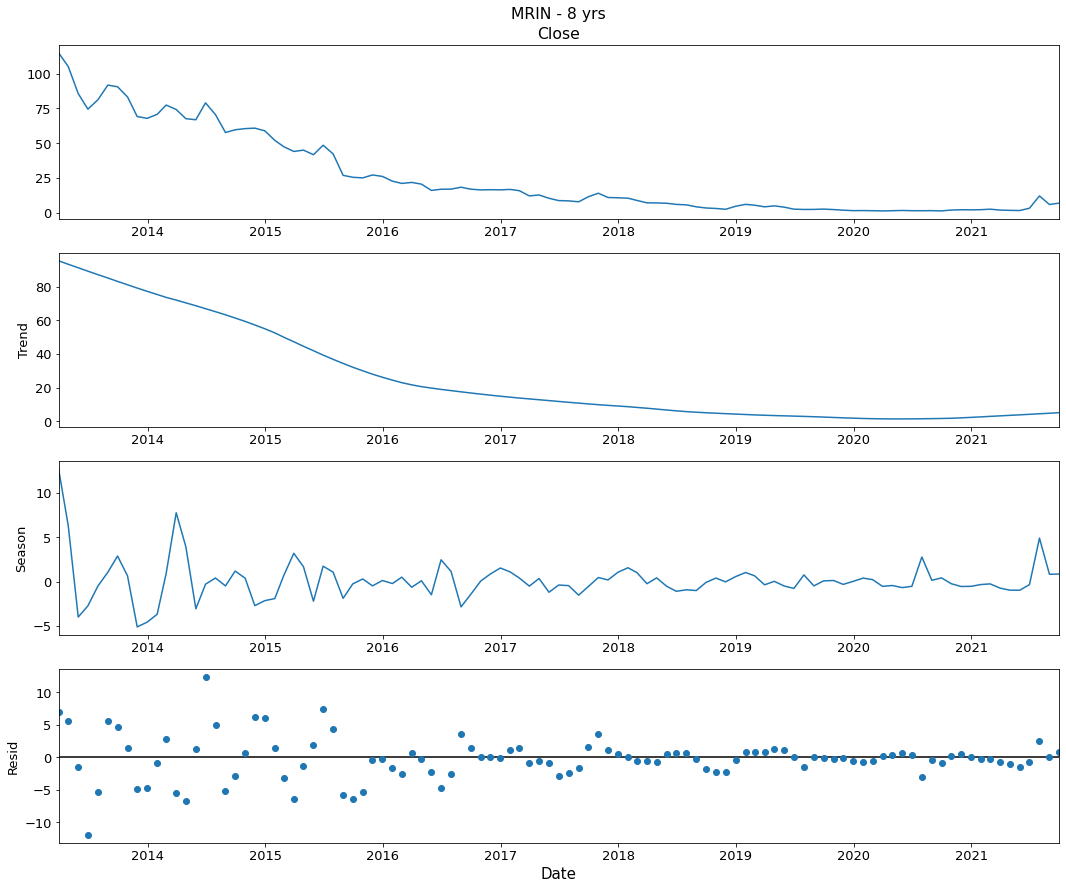

In [21]:
plt.rc('figure', figsize = (15,12))
plt.rc('font', size = 13)

res.plot()
plt.title('MRIN - 8 yrs', pad = 650)
plt.xlabel('Date', fontsize =15)
plt.show()

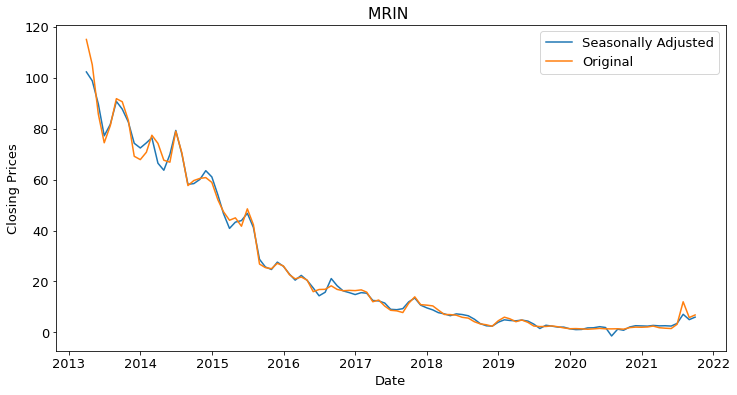

In [23]:
# Seasonally adjusted data
adjusted_seasonal = data - s

plt.figure(figsize=(12,6))
plt.plot(adjusted_seasonal, label='Seasonally Adjusted')
plt.plot(data, label='Original')
plt.title('MRIN ')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

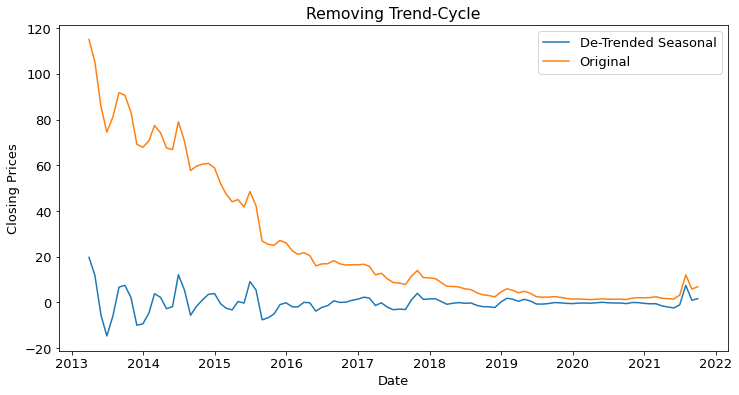

In [24]:
# Detrended data
detrended = data - t

plt.figure(figsize=(12,6))
plt.plot(detrended, label='De-Trended Seasonal')
plt.plot(data, label='Original')
plt.title('Removing Trend-Cycle')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [25]:
# Strength of trend & seasonality
r = np.array(r)
s = np.array(s)
t = np.array(t)
Ft = np.max([0,1-np.var(r)/np.var(t+r)])
Fs = np.max([0,1-np.var(r)/np.var(s+r)])
print('The strength of the trend for this dataset is = ', Ft)
print('The strength of the seasonality for this dataset is = ', Fs)

The strength of the trend for this dataset is =  0.9871412043321997
The strength of the seasonality for this dataset is =  0.4022996292759876


In [ ]:
# To reduce of the growing trend in the series, we first take a log of the series. 
# We then calculate the rolling average of the series after obtaining the log of the series.
#A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

# Make Data Stationary

In [26]:
# First order differencing of the closing price
df_log1 = arima['Close'].diff()
df_log1

Date
2013-03-22         NaN
2013-03-25   -2.730003
2013-03-26    8.190002
2013-03-27   -3.430000
2013-03-28   -0.839996
                ...   
2021-09-23   -0.670000
2021-09-24    1.670000
2021-09-27    0.290000
2021-09-28   -1.140000
2021-09-29   -1.000000
Name: Close, Length: 2147, dtype: float64

In [27]:
df_log = pd.DataFrame(data=df_log1)
df_log

,Close
Date,
2013-03-22,NaN
2013-03-25,-2.730003
2013-03-26,8.190002
2013-03-27,-3.430000
2013-03-28,-0.839996
...,...
2021-09-23,-0.670000
2021-09-24,1.670000
2021-09-27,0.290000


In [28]:
# ADF test First order differencing 
result = adfuller(df_log[1:])
print('MRIN First order differencing')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MRIN First order differencing
ADF Statistic: -12.194657
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [44]:
df_log.to_csv('log_prices.csv')

# Plotting Rolling Mean and Standard Deviation After Differencing 

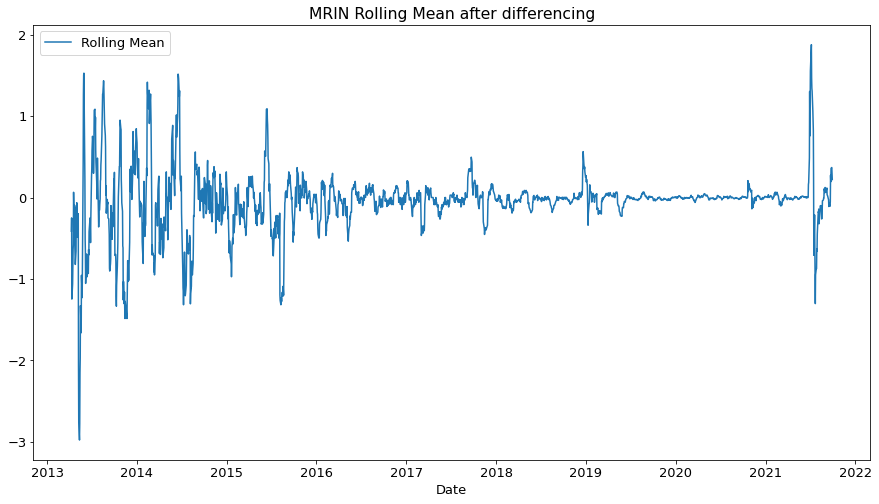

In [29]:
# Plotting mean 

rolling_mean = df_log.rolling(window = 12).mean()

plt.figure(figsize=(15,8))
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.legend()
plt.title('MRIN Rolling Mean after differencing')
plt.xlabel('Date')
plt.show()

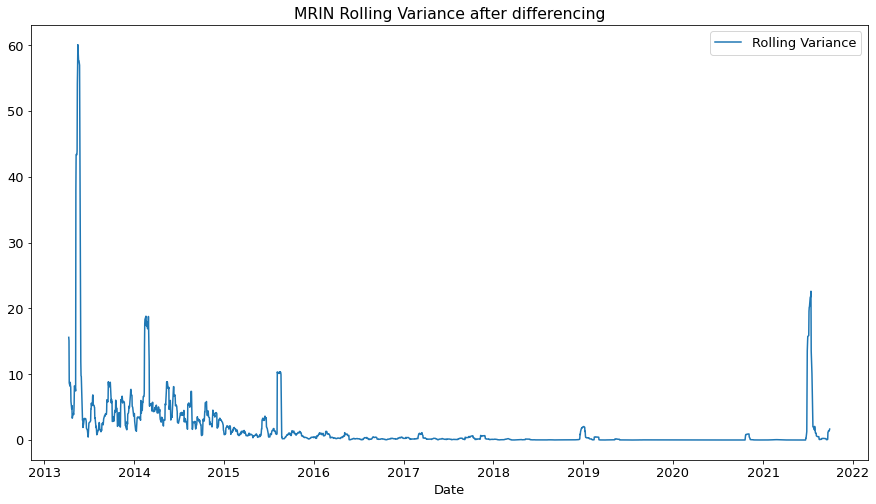

In [30]:
# plotting variance

rolling_var = df_log.rolling(window = 12).var()

plt.figure(figsize=(15,8))
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('MRIN Rolling Variance after differencing')
plt.xlabel('Date')
plt.show()

In [45]:
rolling_var.to_csv('rolling_var.csv')

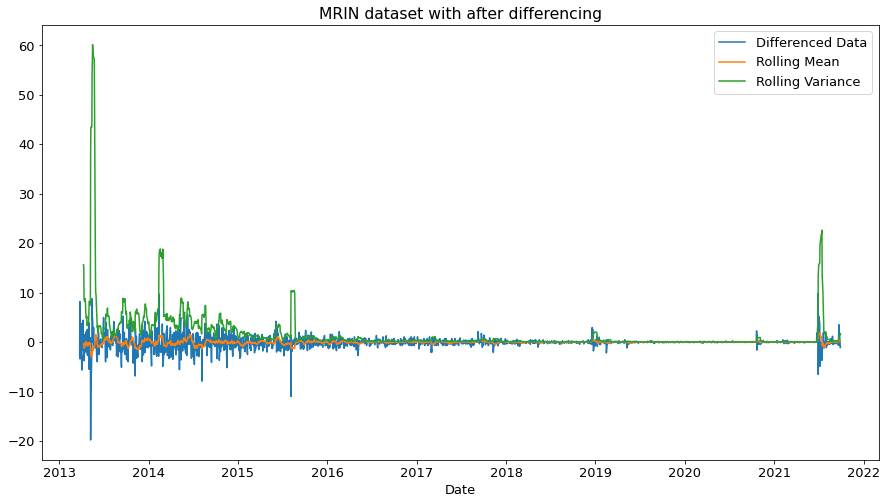

In [31]:
# plotting mean and variance together 

rolling_mean = df_log.rolling(window = 12).mean()
rolling_var = df_log.rolling(window = 12).var()


plt.figure(figsize=(15,8))
plt.plot(df_log.index.values, df_log, label = 'Differenced Data')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('MRIN dataset with after differencing')
plt.xlabel('Date')
plt.show()

# Plotting MRIN Stock Price After Differencing

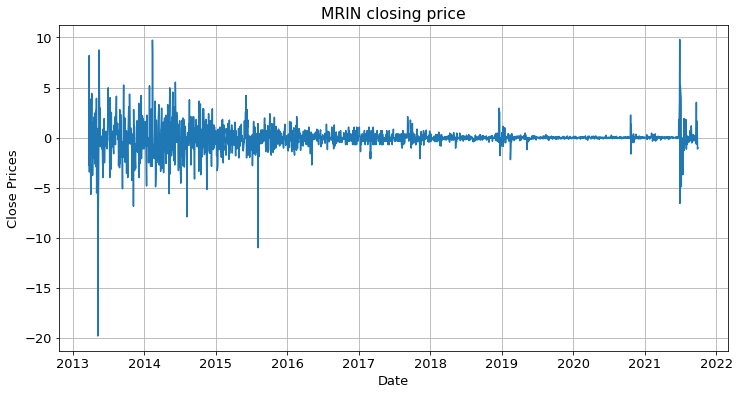

In [32]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_log)
plt.title('MRIN closing price')
plt.show()

# Autocorrelation & Partial Autocorrelation After Differencing (After Reaching Stationarity) (found HW4 $ HW 9)

In [33]:
def autocorr_cal(y, lags):
    
    ry = [1]
    mean = np.mean(y)

    for i in range(1, lags+1):
        sum_auto = 0
        for j in range(i, len(y)):
            sum_auto += (y[j]-mean)*(y[j-i]-mean)

        auto_cov = sum_auto/len(y)

        
        ry.append(auto_cov/np.var(y))
    return ry

            

In [34]:
df_log

,Close
Date,
2013-03-22,NaN
2013-03-25,-2.730003
2013-03-26,8.190002
2013-03-27,-3.430000
2013-03-28,-0.839996
...,...
2021-09-23,-0.670000
2021-09-24,1.670000
2021-09-27,0.290000


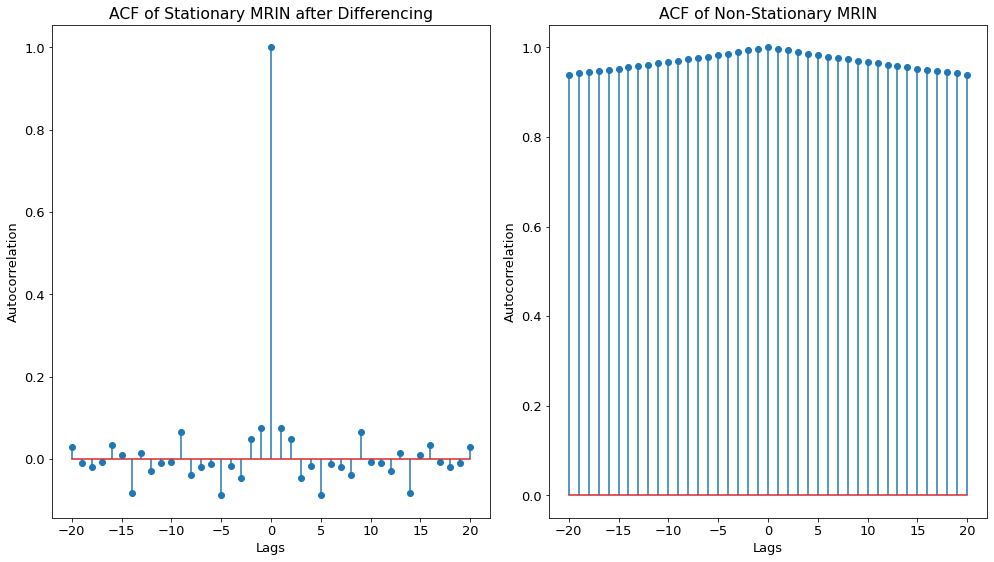

In [36]:
#def auocorr_cal(y, lags):

tau = 20
ry = autocorr_cal(df_log['Close'][1:], tau)
x = np.linspace(-20,20,41)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot autocorrelation
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax1.stem(x, Ry, use_line_collection = True)
ax1.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax1.set_title('ACF of Stationary MRIN after Differencing')

# Find autocorrelation of APPLE at 20 lags
tau = 20
ry = autocorr_cal(arima['Close'], tau)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot 
ax2 = fig.add_subplot(1,2,2)
ax2.stem(x, Ry, use_line_collection = True)
ax2.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax2.set_title('ACF of Non-Stationary MRIN')

fig.tight_layout()
plt.show()
    

In [37]:
Ry

[0.9388996173534416,
 0.9415766765160498,
 0.944170486209798,
 0.9468998573183552,
 0.9496599102218037,
 0.9522735019404446,
 0.954923721732645,
 0.9579367721564105,
 0.9609554997913742,
 0.9640868001681862,
 0.9672491828038995,
 0.970198098897805,
 0.9730902534344766,
 0.9758685093167634,
 0.9789661599971196,
 0.9821881998171615,
 0.9857524840310439,
 0.9893732332320311,
 0.993258541845089,
 0.9966344998954068,
 1,
 0.9966344998954068,
 0.993258541845089,
 0.9893732332320311,
 0.9857524840310439,
 0.9821881998171615,
 0.9789661599971196,
 0.9758685093167634,
 0.9730902534344766,
 0.970198098897805,
 0.9672491828038995,
 0.9640868001681862,
 0.9609554997913742,
 0.9579367721564105,
 0.954923721732645,
 0.9522735019404446,
 0.9496599102218037,
 0.9468998573183552,
 0.944170486209798,
 0.9415766765160498,
 0.9388996173534416]

In [38]:
def GPAC_cal(Ry, k, j): # RY is the estimated autocorrelation
    
    for c in range(1, k):
        
        if c == 1:
            phi_col = []
            for i in range(j):
                start = len(Ry)//2 + i + 1
                num = Ry[start]
                den = Ry[start-1]
                phi_col.append((num/den).tolist())
                matrix1 = np.array(phi_col)

        elif c == 2:
            phi_col = []
            for i in range(j):  
                start = len(Ry)//2 + i
                l_col = Ry[start:start+c] 
                r_num = Ry[start+1:start+c+1]  
                num = np.column_stack((l_col,r_num))
                r_den = Ry[start-1:start+c-1]
                den = np.column_stack((l_col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix2 = np.array(phi_col).reshape(j,1)
            matrix = np.column_stack((matrix1,matrix2))
        else:
            phi_col = []
            for i in range(j):
                col = []
                for a in range(c-1): 
                    start = len(Ry)//2 + i
                    col.append(Ry[start-a:start+c-a].tolist())
                col = np.array(col).T
                r_num = Ry[start+1:start+c+1]
                r_den = Ry[start-c+1:start+1]
                num = np.column_stack((col,r_num))
                den = np.column_stack((col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix3 = np.array(phi_col)
            matrix = np.column_stack((matrix,matrix3))
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt='.3f', xticklabels=np.arange(1, k, step=1))
    sns.color_palette('rocket')
    plt.show()

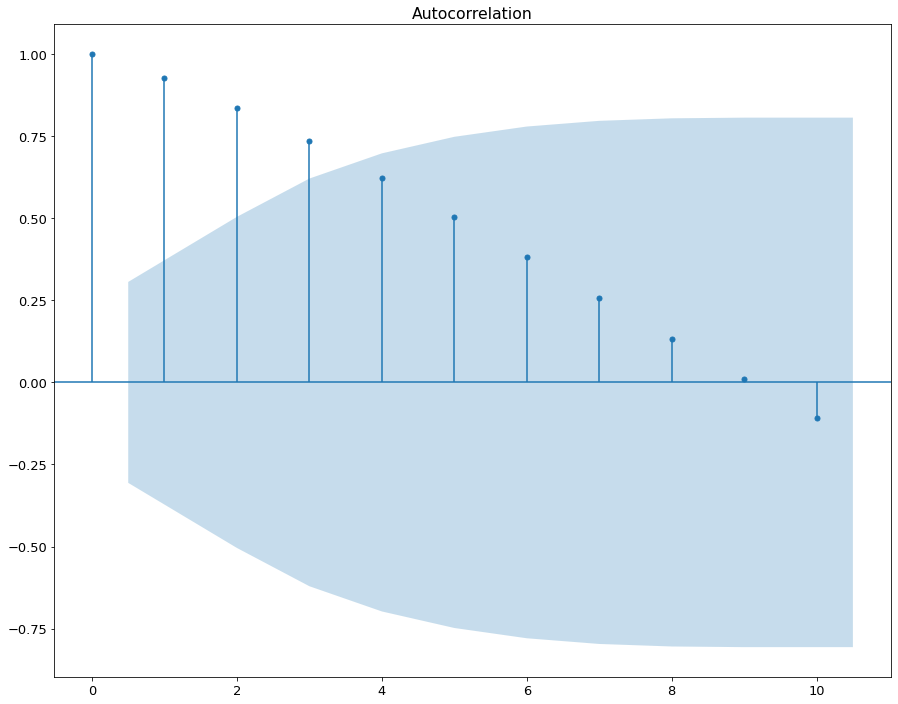

In [39]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(Ry, lags=10)
plt.show()


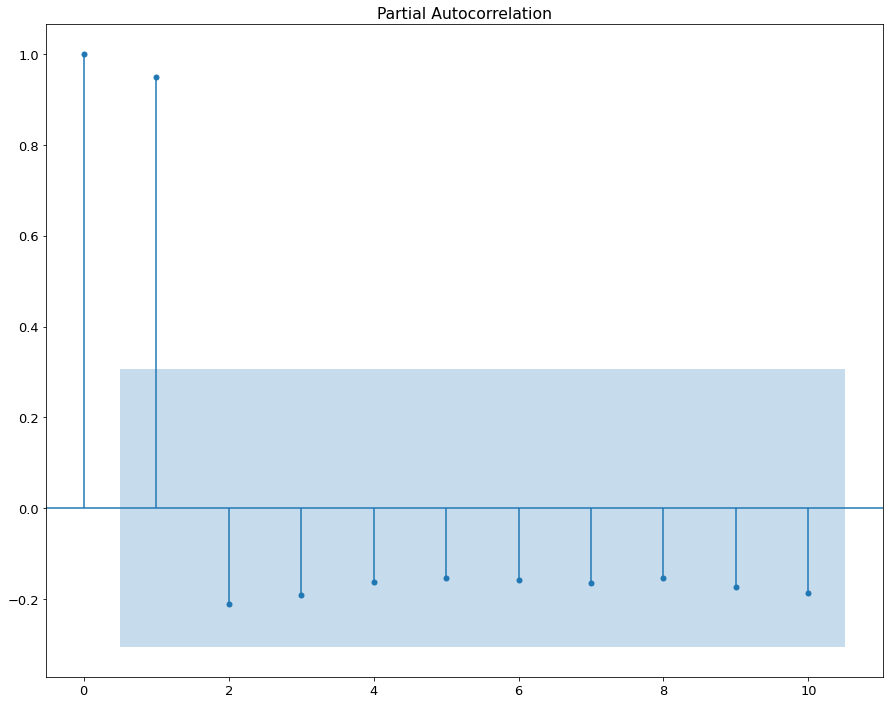

In [40]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_pacf(Ry, lags=10)
plt.show()

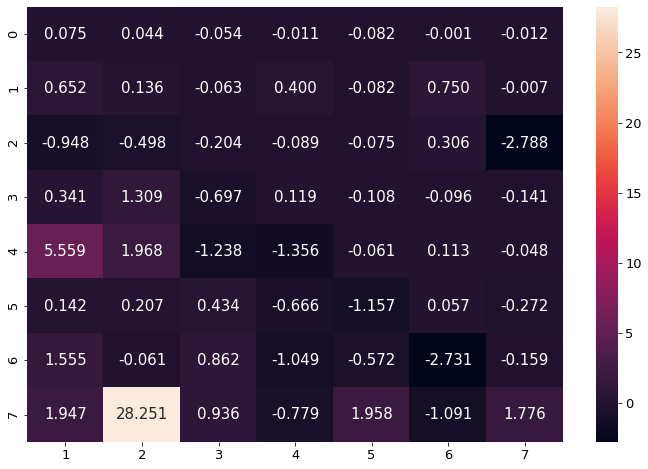

In [41]:
# Plot ACF & PACF
lags = 100

# GPAC
ry = sm.tsa.stattools.acf(df_log[1:], nlags=lags)
ry1 = ry[::-1]
Ry = np.concatenate((ry1[0:-1], ry))
GPAC_cal(Ry,8,8)

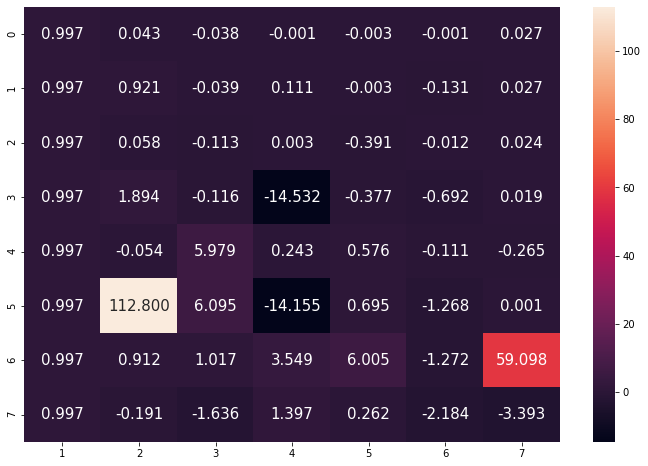

In [46]:
# #Plot ACF & PACF
#lags = 100

#GPAC
#ry = sm.tsa.stattools.acf(arima, nlags=lags)
#ry1 = ry[::-1]
#Ry = np.concatenate((ry1[0:-1], ry))
#GPAC_cal(Ry,8,8)

# Splitting data into training and testing

In [39]:
arima['Close']

Date
2002-01-02      0.416071
2002-01-03      0.421071
2002-01-04      0.423036
2002-01-07      0.408929
2002-01-08      0.403750
                 ...    
2021-09-23    146.830002
2021-09-24    146.919998
2021-09-27    145.369995
2021-09-28    141.910004
2021-09-29    142.830002
Name: Close, Length: 4971, dtype: float64

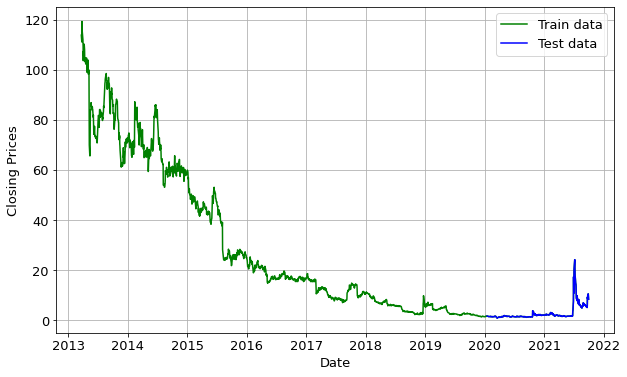

In [42]:
#split data into train and training set
train_data, test_data = arima['Close'][0:int(len(arima['Close'])*0.80)], arima['Close'][int(len(arima['Close'])*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(arima['Close'], 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [43]:
print(len(train_data))
print(len(test_data))

1717
430


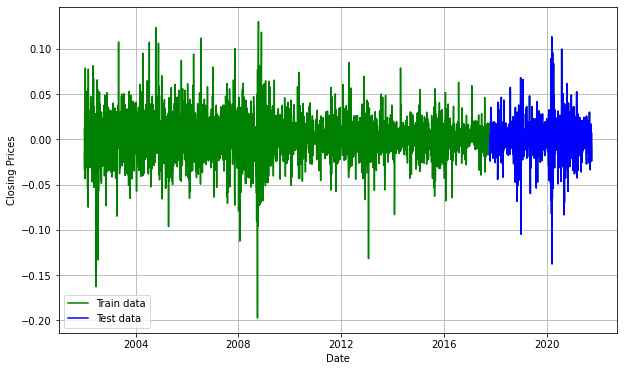

In [38]:
#split data into train and training set
train_data, test_data = df_log1[0:int(len(df_log1)*0.8)], df_log1[int(len(df_log1)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df_log1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Naive Model

In [44]:
# the last period value is the forecat for this period

naive = arima
naive

,Close
Date,
2013-03-22,113.820000
2013-03-25,111.089996
2013-03-26,119.279999
2013-03-27,115.849998
2013-03-28,115.010002
...,...
2021-09-23,8.540000
2021-09-24,10.210000
2021-09-27,10.500000


In [45]:
naive ['lag'] = arima['Close'].shift(1)
naive

,Close,lag
Date,,
2013-03-22,113.820000,NaN
2013-03-25,111.089996,113.820000
2013-03-26,119.279999,111.089996
2013-03-27,115.849998,119.279999
2013-03-28,115.010002,115.849998
...,...,...
2021-09-23,8.540000,9.210000
2021-09-24,10.210000,8.540000
2021-09-27,10.500000,10.210000


In [46]:
# splitting data into 80 training 20 test

train, test = naive[1:naive.shape[0]-430], naive[naive.shape[0]-430:]

In [47]:
train_x, train_y = train['lag'], train['Close']
test_x, test_y = test['lag'], test['Close']

In [48]:
forecast = test_x.copy()


In [49]:
print(forecast)
print(test_y)

# the first are the forecasted values and the second are the actual values
# as we see the value of 2020-12-30 is the predicted values for price 2020-12-31

Date
2020-01-16     1.60
2020-01-17     1.63
2020-01-21     1.64
2020-01-22     1.50
2020-01-23     1.51
              ...  
2021-09-23     9.21
2021-09-24     8.54
2021-09-27    10.21
2021-09-28    10.50
2021-09-29     9.36
Name: lag, Length: 430, dtype: float64
Date
2020-01-16     1.63
2020-01-17     1.64
2020-01-21     1.50
2020-01-22     1.51
2020-01-23     1.50
              ...  
2021-09-23     8.54
2021-09-24    10.21
2021-09-27    10.50
2021-09-28     9.36
2021-09-29     8.36
Name: Close, Length: 430, dtype: float64


In [50]:
mse = mean_squared_error(test_y, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_y, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_y, forecast))
print('RMSE: '+str(rmse))

MSE: 0.7347967065210326
MAE: 0.2555348792741465
RMSE: 0.8572028386099947


In [51]:
def train_MSE(error_sq):
    
    return sum(error_sq.fillna(0))/(len(error_sq) - 1)

In [52]:
def test_MSE(error_sq):

    return sum(error_sq)/(len(error_sq))  

# Alternatively for MSE: mse = np.square(np.subtract(y_test,prediction)).mean()

In [51]:
def variance(error_sq):

    return sum(error_sq.fillna(0))/(len(arima['Close']) - 1)

In [53]:
# Copy training dataframe
naive = arima.copy(deep = True)

# Generate close(t-1)
for i in range(0, naive.shape[0]-1):
     naive.loc[naive.index[i+1], 'naive'] = naive['Close'][i]

# Generate error term
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e'] = naive['Close'][i] - naive['naive'][i]

# Generate squared error
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e^2'] = naive['naive_e'][i]**2

# split data to train and test
train = naive[:1717]
test = naive[1717:]

# Get MSE for naive train and test sets
naive_train_MSE = train_MSE(train['naive_e^2'])
naive_test_MSE = test_MSE(test['naive_e^2'])
naive

,Close,lag,naive,naive_e,naive_e^2
Date,,,,,
2013-03-22,113.820000,NaN,NaN,NaN,NaN
2013-03-25,111.089996,113.820000,113.820000,-2.730003,7.452918
2013-03-26,119.279999,111.089996,111.089996,8.190002,67.076140
2013-03-27,115.849998,119.279999,119.279999,-3.430000,11.764902
2013-03-28,115.010002,115.849998,115.849998,-0.839996,0.705594
...,...,...,...,...,...
2021-09-23,8.540000,9.210000,9.210000,-0.670000,0.448900
2021-09-24,10.210000,8.540000,8.540000,1.670000,2.788900
2021-09-27,10.500000,10.210000,10.210000,0.290000,0.084100


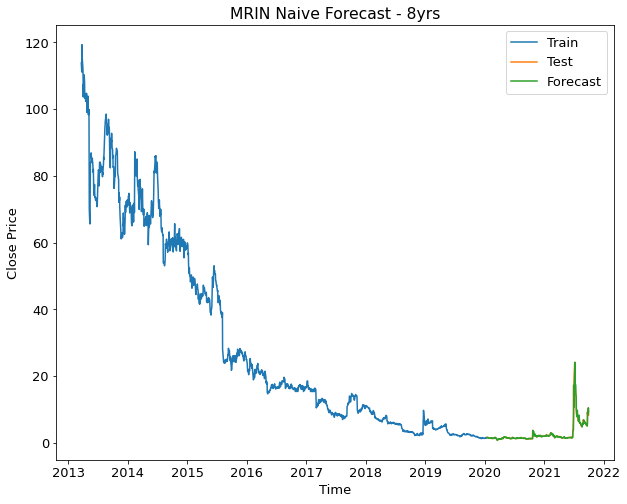

In [54]:
plt.figure(figsize = (10,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, test['naive'], label='Forecast')
plt.title('MRIN Naive Forecast - 8yrs')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

In [55]:
# Print MSE results
print('MSE of prediction errors: ', naive_train_MSE)
print('MSE of forecast errors: ', naive_test_MSE)

MSE of prediction errors:  1.921527230339961
MSE of forecast errors:  0.7347967065210326


# ARIMA Model

In [ ]:
# Auto ARIMA: Automatically discover the optimal order for an ARIMA model. 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5990.728, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5978.807, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5980.208, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5992.551, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5977.033, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5968.356, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5969.286, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5963.895, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5971.741, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5965.839, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5964.689, Time=0.76 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5975.511, Time=0.78 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5966.026, Time=0.93 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=5966.254, Time=0.23 sec

Best model:  ARIMA(3,1,1)(0,0,0)

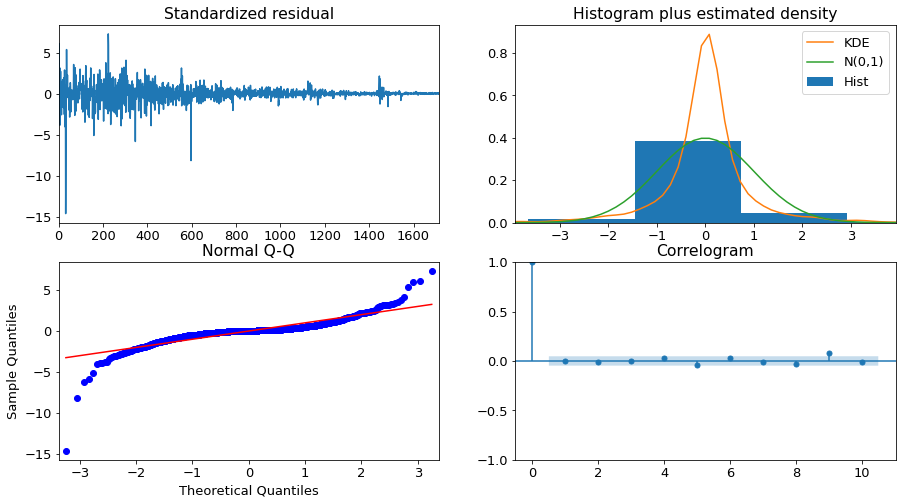

In [56]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

#Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

#Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

#Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

# Modeling:


In [73]:
# Build Model
# if differencing is involved then train data must be raw data that is non stationary
# develop forecasting function after building the model

#  fit a model using training data, and then to evaluate its performance on a test data set.
model = ARIMA(train_data, order=(3,1,1))  
fitted = model.fit() 
print(fitted.summary())



#from statsmodels.tsa.arima_model import ARMA
#from statsmodels.tsa.arima.model import ARIMA

#model = ARMA(train_data, order=(1, 1))# fit model
#fitted = model.fit(disp=-1)  
#print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1716
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2975.948
Method:                       css-mle   S.D. of innovations              1.371
Date:                Sat, 20 Nov 2021   AIC                           5963.895
Time:                        23:08:58   BIC                           5996.582
Sample:                             1   HQIC                          5975.990
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0653      0.031     -2.113      0.035      -0.126      -0.005
ar.L1.D.Close     0.7310      0.137      5.348      0.000       0.463       0.999
ar.L2.D.Close     0.0011      0.033     

# Forecasting

In [74]:
# ARIMA Walk Forward

data = train_data
predict = []
for t in test_data:
    model = ARIMA(data, order=(3,1,1)) #103
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

1.5263632155818347
1.5471199717964679
1.572311467637435
1.4168165895671598
1.4311273488867986
1.4386590493395959
1.3696929593183853
1.327633253850551
1.3242021520607532
1.348824540101215
1.3902847312418494
1.3847335221457577
1.400592316362353
1.3789657000022237
1.3881923524945958
1.4453638632763883
1.2803338896733265
1.3650099080663558
1.3400305181005128
1.2956258187007115
1.3342161060407818
1.2821921869665274
1.3650426368652342
1.304154143096997
1.3268072407095894
1.2698585194532486
1.3535715846187082
1.3268122053667124
1.2944979441509061
1.3000667547271312
1.3459374498076908
1.3660016836443463
1.446671225368134
1.6267989100049474
1.4722651657034345
1.4137079296668498
1.3617152658767502
1.3802411503366179
1.2367332629494845
1.139756565336341
1.0614891326340121
0.7896565278296748
0.9439409062663278
0.9136870230531481
0.9099324203342696
0.8907698475696552
1.0477453336592808
1.1527070065590599
1.172582237949996
1.1832345731708889
1.192824333616709
1.19389823478423
1.1415487971767382
1.16

In [75]:
predict

[1.5263632155818347,
 1.5471199717964679,
 1.572311467637435,
 1.4168165895671598,
 1.4311273488867986,
 1.4386590493395959,
 1.3696929593183853,
 1.327633253850551,
 1.3242021520607532,
 1.348824540101215,
 1.3902847312418494,
 1.3847335221457577,
 1.400592316362353,
 1.3789657000022237,
 1.3881923524945958,
 1.4453638632763883,
 1.2803338896733265,
 1.3650099080663558,
 1.3400305181005128,
 1.2956258187007115,
 1.3342161060407818,
 1.2821921869665274,
 1.3650426368652342,
 1.304154143096997,
 1.3268072407095894,
 1.2698585194532486,
 1.3535715846187082,
 1.3268122053667124,
 1.2944979441509061,
 1.3000667547271312,
 1.3459374498076908,
 1.3660016836443463,
 1.446671225368134,
 1.6267989100049474,
 1.4722651657034345,
 1.4137079296668498,
 1.3617152658767502,
 1.3802411503366179,
 1.2367332629494845,
 1.139756565336341,
 1.0614891326340121,
 0.7896565278296748,
 0.9439409062663278,
 0.9136870230531481,
 0.9099324203342696,
 0.8907698475696552,
 1.0477453336592808,
 1.1527070065590599,

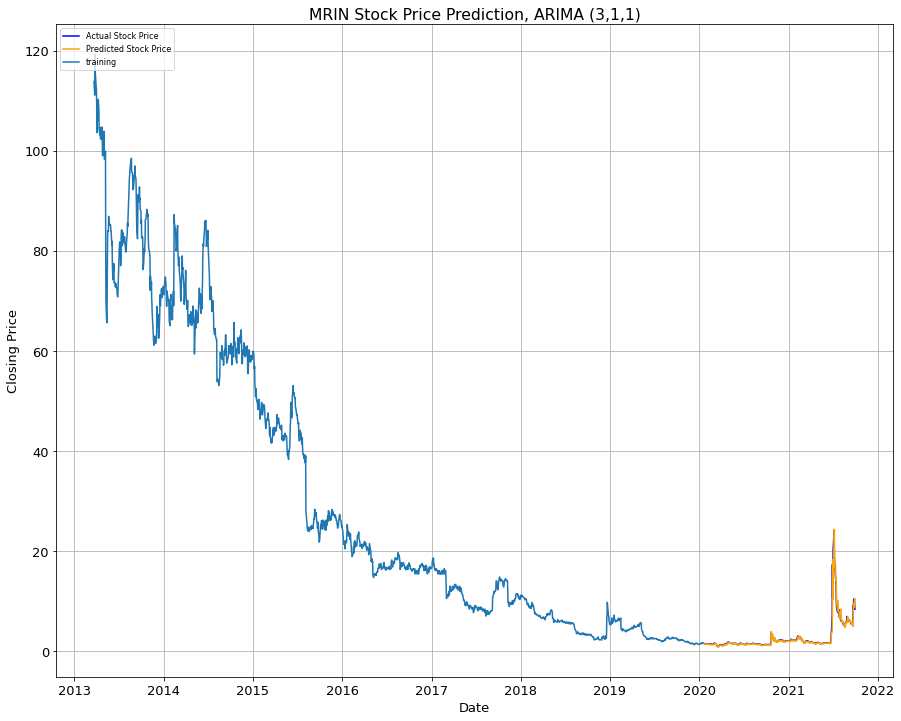

In [76]:
predict = pd.Series(predict, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(predict, color = 'orange',label='Predicted Stock Price')
plt.plot(train_data, label='training')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=0.10)
plt.title('MRIN Stock Price Prediction, ARIMA (3,1,1)')
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Closing Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy Measures:

In [77]:
# Model Performance
mse = mean_squared_error(test_data, predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predict))
print('RMSE: '+str(rmse))

MSE: 0.7931500188901185
MAE: 0.2771261210425717
RMSE: 0.8905897028879901


In [78]:
Accuracy = pd.DataFrame({'MSE':mse, 'MAE': mae, 'RMSE':rmse}, index=[1])
Accuracy

,MSE,MAE,RMSE
1,0.79315,0.277126,0.89059


In [ ]:
# p Autoregressive -  Yt = a+ b1Yt-1 + b2Yt-2 + error 1

# when p = 2

#stock price today(yt)(Nov 8) = a + b1(price yesterday)(Nov 7) + b2(price day before )(Nov 6) + error   


# q Moving Average - Yt = a + Et + b1Et-1 + b2Et-2

#the present value of time series model are dependent on its past values and on the error of past values. the error is the difference between actual 
#values and predicted values. 

# q determines the number of past lag values error used to predict yt (determined by ACF Plot)

# Hyperparameter Tunning (p,d,q)

In [79]:
train,test = arima[:801], arima[801:]

In [177]:
train

Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2021-03-03    122.059998
2021-03-04    120.129997
2021-03-05    121.419998
2021-03-08    116.360001
2021-03-09    121.089996
Name: Close, Length: 801, dtype: float64

In [80]:
test

,AAPL
Date,
2021-03-10,121.03
2021-03-11,123.99
2021-03-12,125.57
2021-03-15,124.76
2021-03-16,120.53
...,...
2021-09-23,146.83
2021-09-24,146.92
2021-09-27,145.37


In [81]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [83]:
p_values = range(0, 8)
d_values = range(0, 1) #this is the range for the values
q_values = range(0, 0) #this is the range for the values

In [84]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = arima[:754], arima[754:]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('Best ARIMA%s , MSE = %.2f' % (order, error))
                except:
                    continue
          

Best ARIMA(0, 0, 0) , MSE = 4949.47
Best ARIMA(0, 0, 1) , MSE = 1527.38
Best ARIMA(0, 0, 2) , MSE = 1258.64
Best ARIMA(1, 0, 0) , MSE = 133.24
Best ARIMA(2, 0, 0) , MSE = 128.05
